# Analyse du dataset 

In [1]:
from sklearn import datasets 
import pandas as pds
import numpy as np

In [2]:
iris = datasets.load_iris()

print(iris.feature_names)
print(iris.target_names)
print(iris)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
  

In [3]:
type(iris.data)
type(iris.target)

numpy.ndarray

In [4]:
X  = iris.data
y = iris.target

In [5]:
# Transformer l'objet iris en DataFrame
dfIris = pds.DataFrame(
        data = np.c_[X,y],
        columns = iris.feature_names + ["target"]
        )

dfIris["target"] = dfIris["target"].astype("category")
dfIris["target"] = dfIris["target"].cat.rename_categories(iris.target_names)

dfIris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


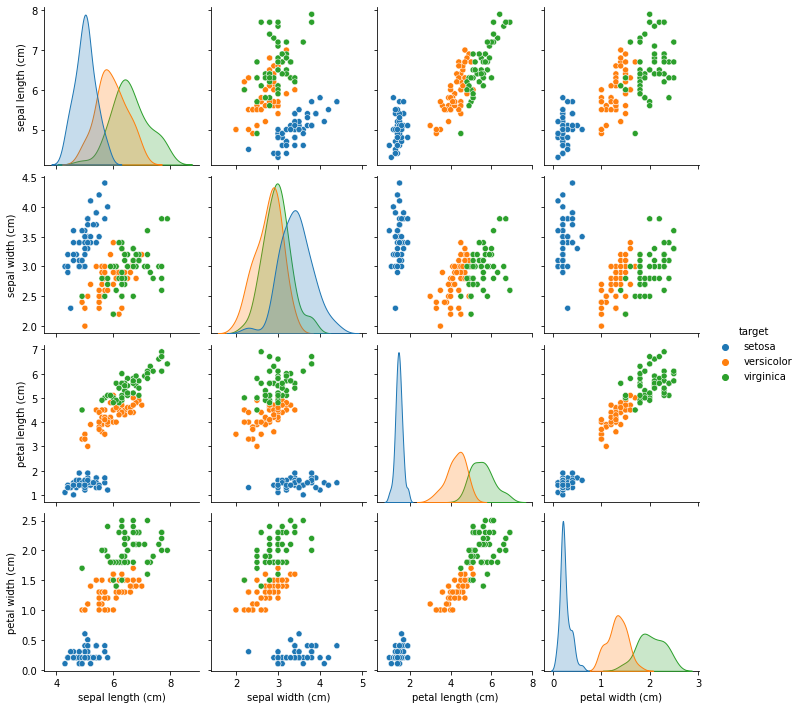

In [6]:
import seaborn as sbs

sbs.pairplot(data = dfIris, hue = "target")

# Supervised learning

In [7]:
from sklearn.model_selection import train_test_split
X = dfIris.drop("target",1)
y = dfIris["target"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=1)

In [8]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [9]:
cv = KFold(5, shuffle = True, random_state= 0)

score_splits = cross_val_score(KNeighborsClassifier(n_neighbors = 8), Xtrain, ytrain, cv = cv)

# on pourrait évaluer notre modèle en changeant les différentes valeurs de l'hyper-paramètre "n_neighbors" pour voir
# comment les résultats évoluent
score_splits

array([0.95833333, 0.95833333, 0.95833333, 1.        , 1.        ])

In [10]:
score_splits.mean()

0.975

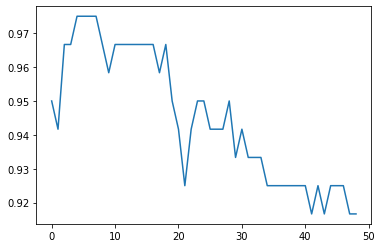

In [11]:
# pour éviter de devoir changer nous même la valeur de l'hyper-paramètre, on peut créer une boucle pour évaluer différentes
# valeurs
import matplotlib.pyplot as plt

val_score = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(n_neighbors = k), Xtrain, ytrain, cv = cv).mean()
    val_score.append(score)

plt.plot(val_score)

In [12]:
# pour éviter d'écrire une boucle for, on peut utiliser la fonction validation_curve qui teste toutes les valeurs pour
# un hyper-paramètre donné
# sorte de GridSearchCV mais pour uniquement un paramètre à évaluer
from sklearn.model_selection import validation_curve

In [13]:
model = KNeighborsClassifier()
k = np.arange(1,50) #numpy.arange([start, ]stop, [step, ]dtype=None) (Return evenly spaced values within a given interval)


train_score, val_score = validation_curve(model, Xtrain, ytrain, 'n_neighbors', k, cv = 5)


/Users/blanchardnicolas/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass param_name=n_neighbors, param_range=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [14]:
val_score.shape 
#ici, 49 valeurs de k-neighbors sont testées avec un cv = 4 (les dims de train_score et test_score sont (49,4))

(49, 5)

In [15]:
# on affiche les scores obtenues pour toutes les valeurs de k et pour les 4 splits de cross-validation
val_score

array([[0.95833333, 0.95833333, 0.95833333, 0.95833333, 0.875     ],
       [0.95833333, 0.91666667, 0.91666667, 0.95833333, 0.875     ],
       [0.95833333, 0.95833333, 1.        , 0.95833333, 0.91666667],
       [0.95833333, 0.95833333, 0.875     , 0.95833333, 0.91666667],
       [0.95833333, 0.95833333, 0.95833333, 0.95833333, 0.875     ],
       [0.95833333, 0.95833333, 0.91666667, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.91666667, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.91666667, 1.        , 0.95833333, 0.95833333],
       [1.        , 0.91666667, 0.95833333, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 1.        , 0.95833333, 0.95833333],
       [1.        , 0.95833333, 1.        , 0.95833333, 0.95833333],
       [1.        , 0.95833333, 1.        , 0.95833333, 0.95833333],
       [1.        , 0.95833333, 0.91666667, 0.95833333, 0.95833333],
       [1.        , 0.95833333, 1.

In [16]:
# afficher le score moyenne pour chaque valeur de k-neighbors
print(val_score.mean(axis = 1))

# axis = 1 permet d'effectuer la moyenne sur les colonnes de chaque ligne
# axis = 0 permet d'effectuer la moyenne sur les lignes de chaque colonne 

#print(train_score.mean(axis = 1))

[0.94166667 0.925      0.95833333 0.93333333 0.94166667 0.95
 0.96666667 0.95833333 0.96666667 0.95833333 0.975      0.975
 0.975      0.95833333 0.96666667 0.96666667 0.96666667 0.96666667
 0.95833333 0.96666667 0.95833333 0.95833333 0.95833333 0.95833333
 0.95833333 0.95833333 0.95833333 0.95833333 0.95       0.95833333
 0.94166667 0.94166667 0.91666667 0.91666667 0.925      0.925
 0.925      0.925      0.925      0.93333333 0.93333333 0.93333333
 0.93333333 0.94166667 0.93333333 0.925      0.93333333 0.91666667
 0.93333333]


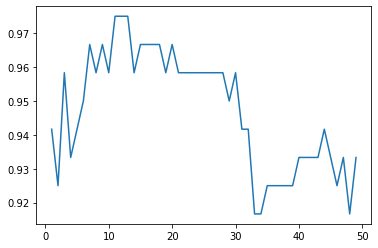

In [17]:
plt.plot(k, val_score.mean(axis = 1))

#on obtient donc le même graphe qu'avec la méthode précédente (la boucle for)

In [18]:
val_score_KNN = val_score.mean(axis = 1)

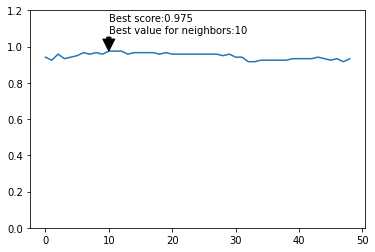

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(val_score_KNN)
ymax = max(val_score_KNN)
xpos = np.argmax(val_score_KNN)
x = range(len(val_score_KNN))
xmax = x[xpos]

ax.annotate(f'Best score:{round(ymax,3)}\nBest value for neighbors:{xmax}', 
            xy=(xmax, ymax), xytext=(xmax, ymax+0.1),
            arrowprops=dict(facecolor='black', shrink=0.005),
            )
ax.set_ylim(1,len(val_score_KNN))
ax.set_ylim(0,1.2)
plt.show()

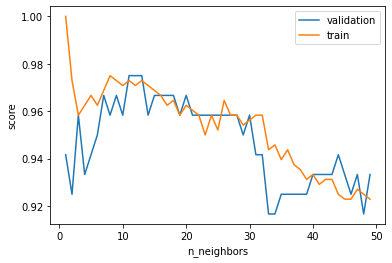

In [20]:
# mais l'avantage d'utiliser la méthode validation_curve et de pouvoir récupérer le train_score et le plotter


plt.plot(k, val_score.mean(axis = 1), label = 'validation')
plt.plot(k, train_score.mean(axis = 1), label = 'train')

plt.ylabel('score')
plt.xlabel('n_neighbors')
plt.legend()

# si très bon train_score mais moins bon val_score signifie qu'on overfit car le modèle s'est trop perfectionné sur le
# trainset et n'a donc pas un bon pouvoir de généralisation

- Cependant,la validation_curve nous permet seulement de règler un hyper-paramètre à la fois. Or, le fait de règler 
- plusieurs hyper-paramètres simultanément peut nous permettre d'améliorer la performance de notre modèle (tester toutes
- les combinaisons entre ces HP et voir laquelle est la meilleure) => le GridSearchCV

- grid = GridSearchCV(model, param_grid, cv)
- Il construit une grille de modèles avec toutes les combinaisons d'hyper-paramètres présents dans param_grid

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
param_grid ={'n_neighbors': np.arange(1,20),
             'metric' : ['euclidean', 'manhattan', 'minkowski']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

grid.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [23]:
grid.best_score_

0.975

In [24]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 11}

In [25]:
grid.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [26]:
model = grid.best_estimator_

model.score(Xtest, ytest)

# notre modèle prédit correctement 96,6% des données qu'il ne donnait pas (test set)

print( "taux de bonnes prédictions: " + str(model.score(Xtest, ytest)))

taux de bonnes prédictions: 0.9666666666666667


In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
ypred = model.predict(Xtest)


cm = confusion_matrix(ytest, ypred)

cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [29]:
labels = dfIris['target'].cat.categories
labels

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [30]:
MaBelleMatrice = pds.DataFrame(cm, columns = labels, index = labels)

MaBelleMatrice

,setosa,versicolor,virginica
setosa,11,0,0
versicolor,0,12,1
virginica,0,0,6


In [31]:
# BONUS
# est-ce que mon modèle pourrait-être plus performant si on lui donnait plus de données? => tracer les courbes 
# d'apprentissage (learning curve): montre la performance d'un modèle en fct des qtés de données qu'on lui donne
# utile car à un certain moment, l'augmentation de la performance du modèle dû à l'augmentation du nb de données 
# qu'on fournit au modèle finit par atteint un plafond => arrêt de la récolte des données (coûteux)

from sklearn.model_selection import learning_curve

N, train_score_learning, val_score_learning = learning_curve(model, Xtrain, ytrain, 
                                                             train_sizes = np.linspace(0.2, 1, 5), cv = 5)


print(N)

[19 38 57 76 96]


In [32]:
np.linspace(0.2, 1, 5)

# ces différentes valeurs vont enfaite être les pourcentages de lots d'entrainement (ex: si 100 données:
# 20, 40, 60, 80, 100 vont être utilisées chacun à leur tour pour l'entrainement)

array([0.2, 0.4, 0.6, 0.8, 1. ])

In [33]:
N

array([19, 38, 57, 76, 96])

In [34]:
len(val_score.mean(axis = 1))

49

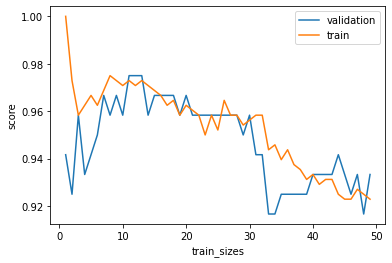

In [35]:
plt.plot(np.arange(1, len(val_score.mean(axis = 1)) + 1), val_score.mean(axis = 1), label = 'validation')
plt.plot(np.arange(1, len(val_score.mean(axis = 1)) + 1), train_score.mean(axis = 1), label = 'train')

plt.ylabel('score')
plt.xlabel('train_sizes')
plt.legend()

# Unsupervised learning

In [36]:
from sklearn.cluster import KMeans

In [37]:
model = KMeans(n_clusters = 3)

# (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn-cluster-kmeans)
# NB: max_iter = Maximum number of iterations of the k-means algorithm for a single run
#    n_init = Number of time the k-means algorithm will be run with different centroid seeds. The final results will 
#             be the best output of n_init consecutive runs in terms of inertia. 
#    => nb de fois que l'algo va être exécuté car différents clusters peuvent être mis en avant en fct de la position 
#       initiale des centroids => les centroids choisis par l'algo seront ceux qui résultent de l'exécution qui 
#       minimise l'inertie (càd la distance intra-cluster))

model.fit(X)

KMeans(n_clusters=3)

In [38]:
model.labels_ #comment sont classées nos différentes instances
#ou
model.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [39]:
plt.scatter(X[:,0], X[:,1], c = model.predict(X))

TypeError: '(slice(None, None, None), 0)' is an invalid key

In [ ]:
# afficher les coordonnées des 3 centroids

model.cluster_centers_ 

In [ ]:
plt.scatter(X[:,0], X[:,1], c = model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c = 'r')

In [ ]:
model.inertia_ #somme des distances entre les points d'un cluster et leur centroid (distance intra-clusters)
#ou (négatif)
# model.score(X)

In [ ]:
# afficher la distance entre chaque point et son centroid
model.transform(X)